<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Mesures & incertitudes
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Méthodes de MonteCarlo
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib notebook

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mesure d'une grandeur physique
La mesure d'une grandeur physique $L$ donne toujours lieu à un ensemble d'incertitudes liée à la répétabilité de la mesure, à la résolution de l'instrument utilisé, aux variations perceptibles ou non des conditions d'utilisation... 

&nbsp;
Le traitement de ces incertitudes dans une manipulation expérimentale est d'une importance capitale pour la recherche comme pour l'industrie. La gestion contrôlée du risque associé à un dispositif, la prise de décision concernant ce même dispositif dépendent de la fiabilité que l'on peut accorder aux mesures faites. Dire qu'un pont va rompre au bout de 100 ans d'utilisation à 3 mois près, ou au bout de 100 ans d'utilisation à 50 ans près n'a pas la même incidence sur sa mise en activité.

&nbsp;
Pour simplifier un concept ou l'expérience et le savoir-faire est cruciale, on commencera par séparer les incertitudes en deux catégories : celles où un traitement statistique est naturel et se met en œuvre par une répétition de la mesure (on parle d'incertitudes de type A), et celles où ce traitement statistique n'est pas possible et se résume à une information donnée par le constructeur de l'appareil de mesure (on parle d'incertitudes de type B).

## Traitement des mesures avec incertitudes de type A

### Exemple : mesure du temps de réponse d'un expérimentateur

Par binôme : un étudiant "lanceur" tient un double-décimètre verticalement, avec l'indication $0$ vers le bas et se prépare à la lâcher sans lui communiquer de vitesse initiale. L'autre étudiant "attrapeur" place sa main en forme de pince au niveau de la graduation $0$ et essaie d'attraper la règle entre pouce et index avant qu'elle ne tombe par terre. On note alors la graduation indiquée par le milieu de l'ongle du pouce de l'attrapeur, ce qui nous donne la hauteur de chute $h$.

&nbsp;
On répète la manipulation dix fois, en notant soigneusement à chaque essai la graduation indiquée par le pouce de l'attrapeur dans la liste (`np.array`) notée `h`,puis on intervertit les rôles et on recommence.

&nbsp;
En supposant que le lanceur n'a jamais communiqué de vitesse initiale et a correctement effectué son travail, la mécanique des corps ponctuels permet d'évaluer la durée de la chute de la règle et donc le temps de réponse de l'attrapeur :
$$t=\sqrt{2gh}$$

&nbsp;
On peut alors procéder à un traitement statistique de type A en calculant d'une part la moyenne des temps de réponse $\overline{t}$ ainsi que l'écart-type de ce temps de réponse $u(\overline{t})$ en utilisant le script ci-dessous.

In [2]:
# Constantes dont la valeur est connue de façon "infiniment précise"
g = 9.81                                       # accélération de pesanteur en m/s**2

# Grandeur mesurée
h = np.array([1, 1.1, .9, 1.2, 1.3, 1.1, .8, .9, 1., 1.1]) # hauteur en cm

# Utilisation des propriétés des array pour calculer le temps de réponse de chaque mesure faite
t = np.sqrt(2*g*h/100)                          # temps de réponse en seconde

# Calcul de la valeur moyenne et de l'écart-type du temps de réponse
t_moy = np.mean(t)                            # temps de réponse moyen
u_t = np.std(t)                               # écart-type du temps de réponse

print("Votre temps moyen de réponse est : %.3f s" % t_moy)
print("L'incertitude type associée à ce temps de réponse est : %.3f s" % u_t)

Votre temps moyen de réponse est : 0.451 s
L'incertitude type associée à ce temps de réponse est : 0.031 s


Pour aller plus loin on pourrait s'interroger sur la part d'incertitude associée à la lecture de la graduation sur la règle. C'est l'objet du paragraphe suivant. 

&nbsp;
Il faudra alors composer les incertitudes associées d'une part à la répétition des mesures de la première manipulation et d'autre part à la lecture de $h$.

## Traitement des mesures avec incertitudes de type B
La répétition d'une expérience est parfois trop couteuse ou semble n'apporter aucune nouvelle information : mesurer 100 fois la longueur d'une feuille avec un double décimètre donnera 100 fois le même résultat pour peu que l'on s'applique dans sa mesure.

&nbsp;
Pour autant, cette certitude n'est qu'apparente. Si on améliore la résolution de l'appareil des écarts de mesure finiront bien souvent par apparaître. Il faut donc composer avec le matériel disponible et admettre que la valeur mesurée a une précision limitée par la résolution de l'instrument de mesure. Cette incertitude de mesure doit être évaluée aussi précisément que possible (demi-graduation, notice d'utilisation...) et l'expérience, le savoir-faire jouent ici un grand rôle dans son estimation. 

&nbsp;
On admettra donc que toute grandeur $X$ mesurée est une variable aléatoire ayant une valeur moyenne $\overline{X}$ et une incertitude-type $u(X)$ associée. Les grandeurs mesurées en T.P. seront donc traitées comme des variables aléatoires dont la répartition pourra être uniforme sur un intervalle donné (mesure à la règle par exemple), ou gaussienne.

&nbsp;
La manipulation de cette mesure aléatoire se fera simplement à l'aide des listes de `numpy` et on pourra l'écrire sous la forme :
$$X=[\overline{X}, u(X)]$$

&nbsp;
Par exemple, la mesure de la longueur d'une feuille A4 pourra être représentée par la liste python :
`L=[29.7, 0.05]`. Une valeur possible de la longueur de cette feuille A4 est donc égale au tirage aléatoire d'une longueur possible : `long = L[0]+np.random.normal()*L[1]`

In [3]:
# Donnée mesurée et son écart-type
L=[29.7, 0.05]

# Tirage aléatoire de deux longueurs possibles de la feuille A4
long1 = L[0]+np.random.normal()*L[1]
long2 = L[0]+np.random.normal()*L[1]

print("Une longueur possible de la feuille A4 est : %.3f cm" % long1)
print("Une autre longueur possible de cette même feuille A4 est : %.3f cm" % long2)

Une longueur possible de la feuille A4 est : 29.738 cm
Une autre longueur possible de cette même feuille A4 est : 29.636 cm


La distribution des longueurs possibles de la feuille A4 est présentée ci-dessous :

<IPython.core.display.Javascript object>


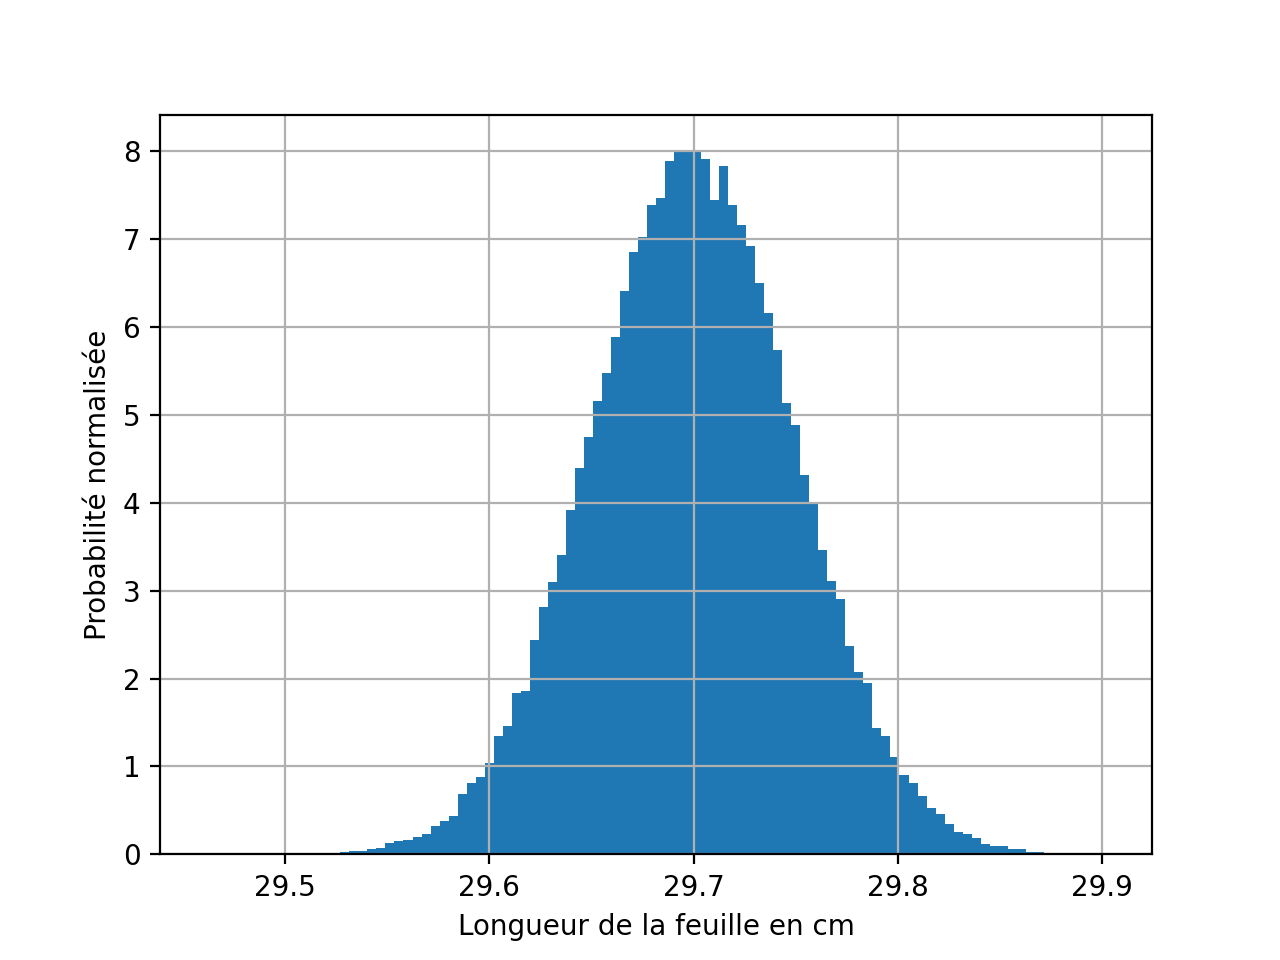

La longueur moyenne de la feuille A4 est : 29.700 cm
L'incertitude type associée à la longueur de la feuille A4 est : 0.050 cm


In [4]:
N = 100000 # nombre d'itérations

# Donnée mesurée et son écart-type
L=[29.7, 0.05]

# Tableau de stockage des diverses longueurs possibles
tab_long=[]

# Remplissage du tableau de stockage
for i in range (N):
    long = L[0]+np.random.normal()*L[1]
    tab_long.append(long)

# Représentation de l'histogramme de répartition des diverses longueurs possibles
plt.figure()
plt.hist(tab_long,bins=100, density=True, stacked=True)
plt.xlabel("Longueur de la feuille en cm")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La longueur moyenne de la feuille A4 est : %.3f cm" % np.mean(tab_long))
print("L'incertitude type associée à la longueur de la feuille A4 est : %.3f cm" % np.std(tab_long))

<IPython.core.display.Javascript object>


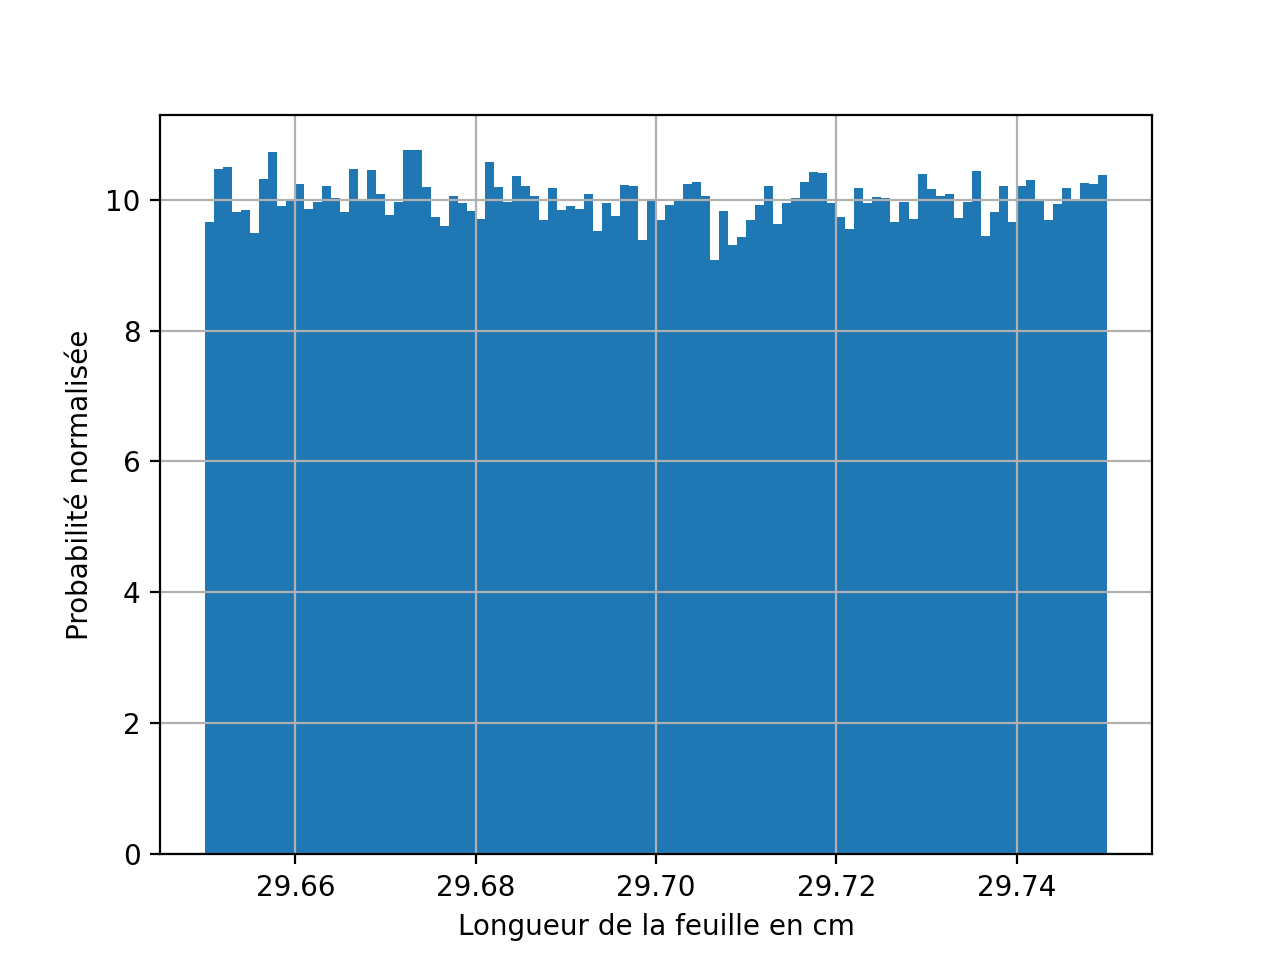

La longueur moyenne de la feuille A4 est : 29.700 cm
L'incertitude type associée à la longueur de la feuille A4 est : 0.029 cm


In [5]:
N = 100000 # nombre d'itérations

# Donnée mesurée et son écart-type
L=[29.7, 0.05]

# Tableau de stockage des diverses longueurs possibles
tab_long=[]

# Remplissage du tableau de stockage
for i in range (N):
    long = L[0]+np.random.uniform(-1,1)*L[1]
    tab_long.append(long)

# Représentation de l'histogramme de répartition des diverses longueurs possibles
plt.figure()
plt.hist(tab_long,bins=100, density=True, stacked=True)
plt.xlabel("Longueur de la feuille en cm")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La longueur moyenne de la feuille A4 est : %.3f cm" % np.mean(tab_long))
print("L'incertitude type associée à la longueur de la feuille A4 est : %.3f cm" % np.std(tab_long))

Comment choisir entre gaussien ou uniforme?

## Composition des incertitudes 

On cherche à établir la valeur de la constante de raideur d'un ressort en l'attachant à une potence et en le soumettant à l'action de diverses masses notées $m_i$. 
Pour chaque masse utilisée, on peut écrire la relation : 
$$k_i=\dfrac{m_i g}{\ell_i-\ell_0}$$
où $m_i$ est la masse utilisée, $\ell_i$ la longueur mesurée, et $k_i$ la constante de raideur déduite de ces deux grandeurs.

&nbsp;
On prendra 5 masses de valeurs différentes que l'on mesurera à l'aide d'une balance de précision. L'incertitude-type est donnée par le constructeur et vaut $u_0=0,1~\text{g}$. Les 5 masses et leur incertitude-type seront notées comme liste de listes `m=[[val1, u0], [val2, u0], [val3, u0], [val4, u0] ,[val5, u0]]`.<br/>
La longueur à vide est mesurée une fois pour toutes au double-décimètre et on notera `l0=[val, u]`. Enfin, la mesure des longueurs $\ell_i$ est également faite à la règle, mais pourra être entâchée d'une erreur variable et sera également enregistrée dans une liste de listes `l=[[val1, u1], [val2, u2], [val3, u3], [val4, u4] ,[val5, u5]]`...

&nbsp;
La composition des incertitudes est alors faite à l'aide de `numpy` en bouclant sur toutes les valeurs possibles de $k_i$ calculées selon la relation précédente.

<IPython.core.display.Javascript object>


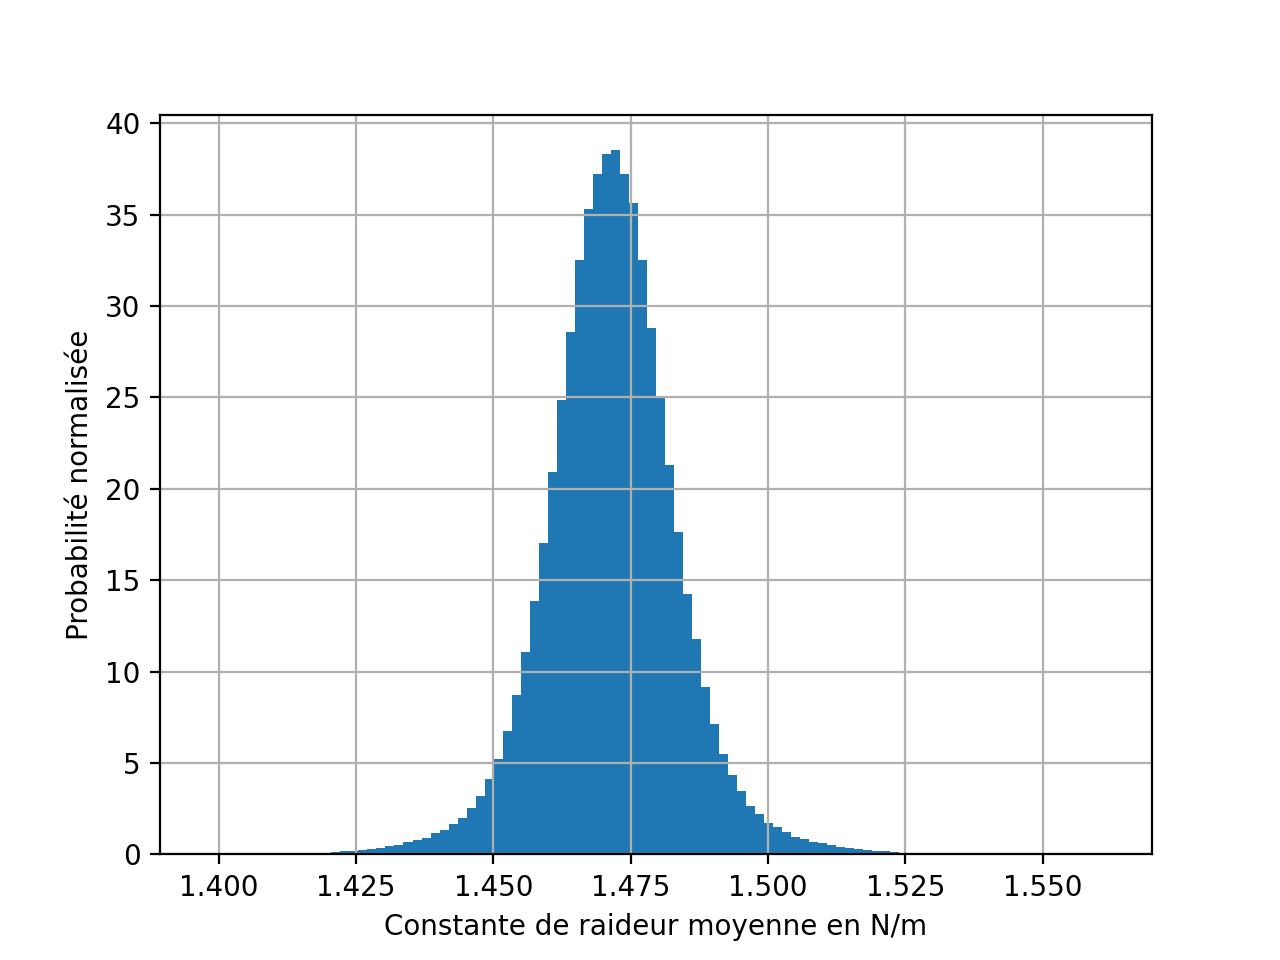

La constante de raideur moyenne est : 1.472 N/m
L'incertitude type associée à la constante de raideur est : 0.012 N/m


In [6]:
## Déclaration des constantes
g = 9.81

# Déclaration des variables mesurées
l0 = [5, 0.05]                                                 # mesure de la longueur à vide, incertitude
m = [[15, 0.1], [30, 0.1], [45, 0.1], [60, 0.1], [75, 0.1]]    # mesure de la masse i, incertitude en g
l = [[15, .1], [25, .1], [35, .2], [45, .2], [55, .3]]         # mesure de la longueur i, incertitude en cm

# Tableau de stockage des diverses longueurs possibles
tab_l0=[]
tab_m=[]
tab_l=[]

# Remplissage des tableaux de stockage
for i in range (N):
    for j in range(len(m)):
        tab_l0.append(l0[0]+np.random.normal()*l0[1])
        tab_m.append(m[j][0]+np.random.normal()*m[j][1])
        tab_l.append(l[j][0]+np.random.normal()*l[j][1])
        #tab_l0.append(l0[0]+np.random.uniform(-1,1)*l0[1])
        #tab_m.append(m[j][0]+np.random.uniform(-1,1)*m[j][1])
        #tab_l.append(l[j][0]+np.random.uniform(-1,1)*l[j][1])


## Conversion des unités non SI et calcul des diverses valeurs possibles de k_i
tab_k=np.array(tab_m)*1e-3*g/(np.array(tab_l)*1e-2-np.array(tab_l0)*1e-2)

## Tracé de l'histogramme de distribution des valeurs possibles de k_i
plt.figure()
plt.hist(tab_k,bins=100, density=True, stacked=True)
plt.xlabel("Constante de raideur moyenne en N/m")
plt.ylabel("Probabilité normalisée")
plt.grid(True)
plt.show()

print("La constante de raideur moyenne est : %.3f N/m" % np.mean(tab_k))
print("L'incertitude type associée à la constante de raideur est : %.3f N/m" % np.std(tab_k))

# Régression linéaire

Le calcul précédent part du principe que la loi $F=k(\ell-\ell_0)$ est vérifiée. Il s'appuie sur cette loi pour déterminer les diverses valeurs possibles de $k$, puis sa valeur moyenne et son incertitude-type.

&nbsp;
Si la loi est elle-même un point à vérifier, il faut avant tout tracer les points mesurés et s'assurer à l'œil d'une conformité à une droite affine. Dans l'exemple précédente, on trace l'ensemble des valeurs possibles de $F=mg$ en fonction de l'ensemble des valeurs possibles de $\ell$. Si la loi est vérifiée, le nuage de points doit sembler être une droite de pente $k$ et d'ordonnée à l'origine $-k\ell_0$.

<IPython.core.display.Javascript object>


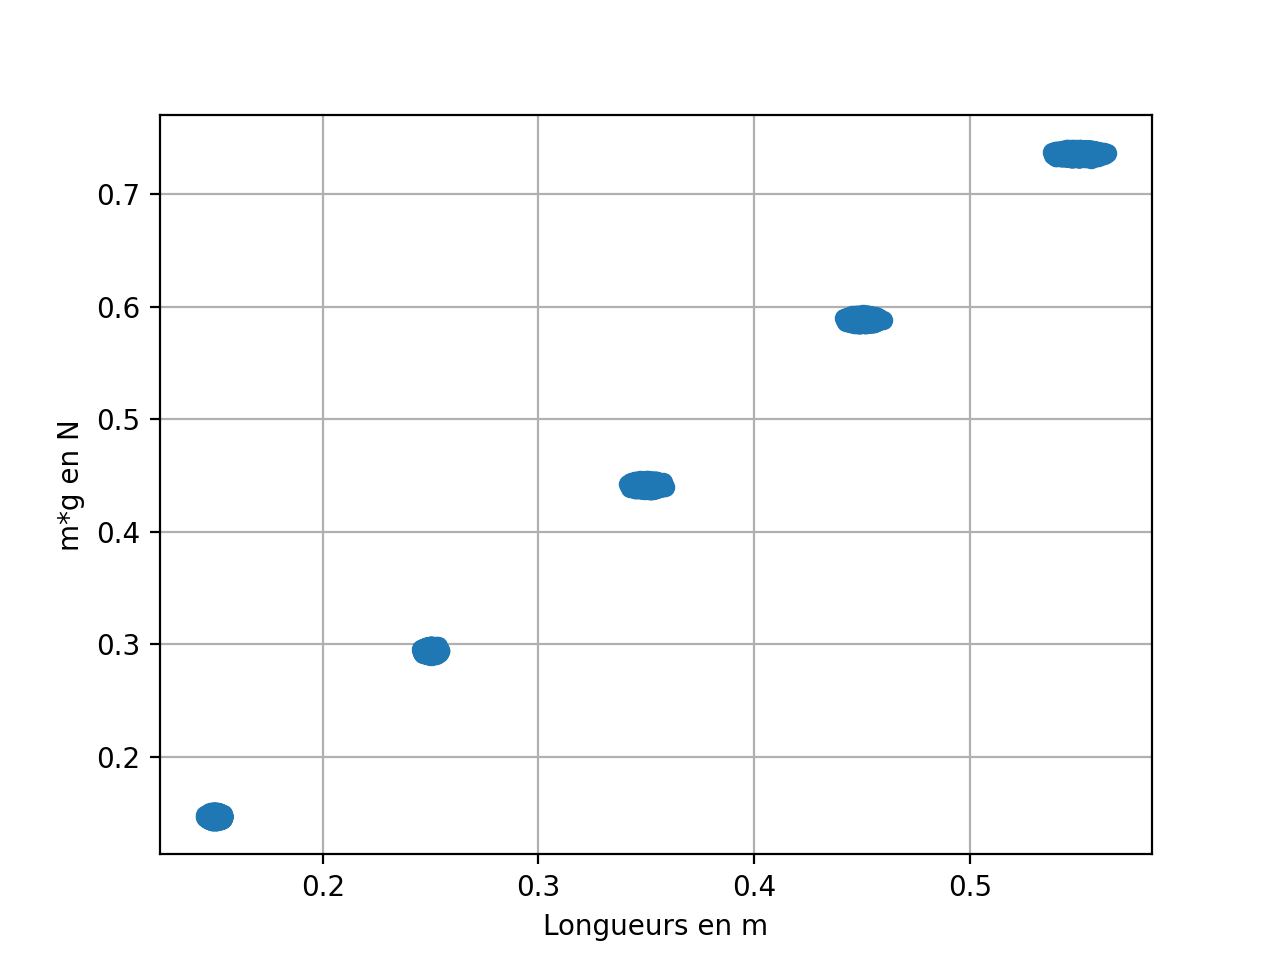

In [7]:
# Tracé des nuages de points
plt.figure()
plt.plot(np.array(tab_l)*1e-2, 1e-3*g*np.array(tab_m), 'o')
plt.xlabel("Longueurs en m")
plt.ylabel("m*g en N")
plt.grid(True)
plt.show()

L'aspect linéaire (affine en réalité) étant établi, on peut maintenant utiliser `numpy` pour proposer un régression linéaire associée à cette collection de points.<br/>

Il faut pour cela séparer à nouveau les données en $N$ jeux de 5 valeurs, en déduire pour chaque quintuplet une pente et une ordonnée à l'origine et procéder à nouveau à une moyenne.

In [8]:
# Déclaration des tableaux de stockage
k_fit=[]
kl0_fit=[]

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    tab2_m=[m[0][0]+np.random.normal()*m[0][1], m[1][0]+np.random.normal()*m[1][1], m[2][0]+np.random.normal()*m[2][1], m[3][0]+np.random.normal()*m[3][1], m[4][0]+np.random.normal()*m[4][1]]
    tab2_l=[l[0][0]+np.random.normal()*l[0][1], l[1][0]+np.random.normal()*l[1][1], l[2][0]+np.random.normal()*l[2][1], l[3][0]+np.random.normal()*l[3][1], l[4][0]+np.random.normal()*l[4][1]]
    z=np.polyfit(np.array(tab2_l)*1e-2, np.array(tab2_m)*g*1e-3,1)
    k_fit.append(z[0])
    kl0_fit.append(-z[1])

# Calcul de la moyenne et incertitude-type de k
k_fit_moy=np.mean(k_fit)
u_k_fit=np.std(k_fit)

# Calcul de l'ensemble des valeurs possibles de l0 basé sur celui de la pente et de l'ordonnée à l'origine
l0_fit=np.array(kl0_fit)/np.array(k_fit)

# Calcul de la moyenne et incertitude-type de l0
l0_fit_moy=np.mean(l0_fit)
u_l0_fit=np.std(l0_fit)

On peut à nouveau tracer la courbe précédente en y rajoutant la droite obtenue par régression linéaire

<IPython.core.display.Javascript object>


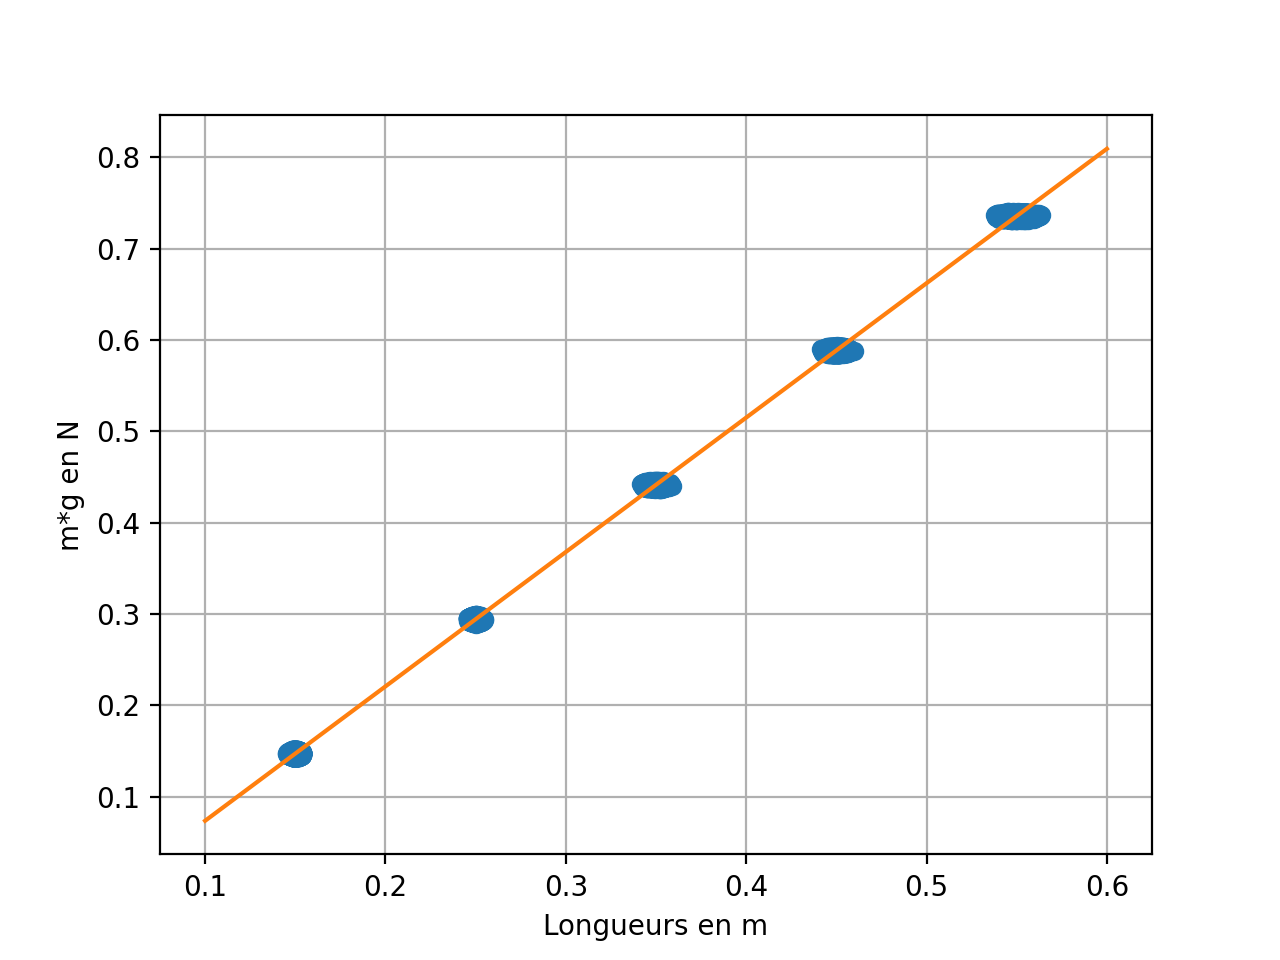

La constante de raideur moyenne est : 1.471 N/m
L'incertitude type associée à la constante de raideur est : 0.010 N/m
La longueur à vide moyenne du ressort est : 0.050 m
L'incertitude type associée à la longueur à vide du ressort est : 0.002 m


In [10]:
# Calcul du nuage de points associé à la droite de régression calculée précédemment
x=np.linspace(0.1, 0.6, 100)
y=k_fit_moy*(x-l0_fit_moy)

# Tracé du nuage de points associé aux valeurs possibles de mg et de l
plt.figure()
plt.plot(np.array(tab_l)*1e-2, 1e-3*g*np.array(tab_m), 'o')
plt.plot(x,y)
plt.xlabel("Longueurs en m")
plt.ylabel("m*g en N")
plt.grid(True)
plt.show()

print("La constante de raideur moyenne est : %.3f N/m" % k_fit_moy)
print("L'incertitude type associée à la constante de raideur est : %.3f N/m" % u_k_fit)

print("La longueur à vide moyenne du ressort est : %.3f m" % l0_fit_moy)
print("L'incertitude type associée à la longueur à vide du ressort est : %.3f m" % u_l0_fit)